In [1]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from finite_volume.advection import AdvectionSolver
from configs import problem_configs, solver_config
from utils import pd_xlsx_write

In [21]:
limiter_configs = {
    "a priori": dict(apriori_limiting=True, SED=True),
    "a posteriori": dict(
        aposteriori_limiting=True,
        fallback_limiter="minmod",
        hancock=True,
        convex=True,
        SED=True,
    ),
}

n = 256
p = 5
num_snapshots, snapshot_dt = 10, 0.1

for C in ["mpp", 0.5, 0.8]:
    apriori_Solver = AdvectionSolver(
        n=n,
        order=p + 1,
        courant=C,
        num_snapshots=num_snapshots,
        snapshot_dt=snapshot_dt,
        **limiter_configs["a priori"],
        **problem_configs["composite"],
        **solver_config,
    )
    apriori_Solver.rkorder()
    print(
        f"{C=}, a priori mpp violation: {apriori_Solver.compute_mpp_violations()[1]['worst']}"
    )

    aposteriori_Solver = AdvectionSolver(
        n=n,
        order=p + 1,
        courant=C,
        num_snapshots=num_snapshots,
        snapshot_dt=snapshot_dt,
        **limiter_configs["a posteriori"],
        **problem_configs["composite"],
        **solver_config,
    )
    aposteriori_Solver.rkorder()
    print(
        f"{C=}, a posteriori mpp violation: {aposteriori_Solver.compute_mpp_violations()[1]['worst']}"
    )

C='mpp', a priori mpp violation: -1.8572606849981077e-13
C='mpp', a posteriori mpp violation: -2.4456496535612524e-09
Try a  CFL factor less than 0.08333

C=0.5, a priori mpp violation: -6.8689858649335645e-09
C=0.5, a posteriori mpp violation: -2.729606584719623e-08
Try a  CFL factor less than 0.08333

C=0.8, a priori mpp violation: -1.1069783223744645e-07
C=0.8, a posteriori mpp violation: -1.1216587459871964e-08


In [2]:
limiter_configs = {
    "a priori": dict(courant="mpp", apriori_limiting=True, SED=True),
    "a posteriori": dict(
        courant="mpp",
        aposteriori_limiting=True,
        fallback_limiter="minmod",
        hancock=True,
        convex=True,
        SED=True,
    ),
}

data = []
for n, p, lckey, integrator in product(
    [128, 256, 512],
    range(8),
    ["a priori", "a posteriori"],
    ["euler", "ssprk2", "ssprk3", "rk4", "rk6"],
):
    if integrator == "euler" and p != 0:
        continue
    if integrator == "ssprk2" and p != 1:
        continue
    if integrator == "ssprk3" and p not in {2, 3, 4, 5, 6, 7}:
        continue
    if integrator == "rk4" and p not in {3, 4, 5, 6, 7}:
        continue
    if integrator == "rk6" and p not in {4, 5, 6, 7}:
        continue
    solver = AdvectionSolver(
        n=n,
        order=p + 1,
        **limiter_configs[lckey],
        **problem_configs["composite"],
        **solver_config,
    )
    if integrator == "euler":
        solver.euler()
    elif integrator == "ssprk2":
        solver.ssprk2()
    elif integrator == "ssprk3":
        solver.ssprk3()
    elif integrator == "rk4":
        solver.rk4()
    elif integrator == "rk6":
        solver.rk6()
    data.append(
        dict(
            n=n,
            p=p,
            limiter=lckey,
            integrator=integrator,
            delta=solver.compute_mpp_violations()[1]["worst"],
        )
    )
df = pd.DataFrame(data)

pd_xlsx_write(df, "data/integrators.xlsx", sheet_name="composite")

In [3]:
data = []
for n, p, lckey, integrator in product(
    [32, 64, 128],
    range(8),
    ["a priori", "a posteriori"],
    ["euler", "ssprk2", "ssprk3", "rk4", "rk6"],
):
    if integrator == "euler" and p != 0:
        continue
    if integrator == "ssprk2" and p != 1:
        continue
    if integrator == "ssprk3" and p not in {2, 3, 4, 5, 6, 7}:
        continue
    if integrator == "rk4" and p not in {3, 4, 5, 6, 7}:
        continue
    if integrator == "rk6" and p not in {4, 5, 6, 7}:
        continue
    solver = AdvectionSolver(
        n=(n,),
        order=p + 1,
        **limiter_configs[lckey],
        **problem_configs["square2d"],
        **solver_config,
    )
    if integrator == "euler":
        solver.euler()
    elif integrator == "ssprk2":
        solver.ssprk2()
    elif integrator == "ssprk3":
        solver.ssprk3()
    elif integrator == "rk4":
        solver.rk4()
    elif integrator == "rk6":
        solver.rk6()
    data.append(
        dict(
            n=n,
            p=p,
            limiter=lckey,
            integrator=integrator,
            delta=solver.compute_mpp_violations()[1]["worst"],
        )
    )
df = pd.DataFrame(data)

pd_xlsx_write(df, "data/integrators.xlsx", sheet_name="square2d")

New solution instance...


100%|██████████| 1.0/1.0 [04:15]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_5_g_T_F_F_mi_F_F_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk6_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [01:26]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_5_g_F_F_T_mi_T_T_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_ssprk3_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [01:48]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_5_g_F_F_T_mi_T_T_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk4_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [03:07]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_5_g_F_F_T_mi_T_T_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk6_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [01:40]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_6_g_T_F_F_mi_F_F_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_ssprk3_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [02:19]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_6_g_T_F_F_mi_F_F_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk4_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [03:50]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_6_g_T_F_F_mi_F_F_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk6_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [01:30]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_6_g_F_F_T_mi_T_T_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_ssprk3_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [01:58]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_6_g_F_F_T_mi_T_T_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk4_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [03:21]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_6_g_F_F_T_mi_T_T_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk6_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [04:05]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_7_g_T_F_F_mi_F_F_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_ssprk3_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [05:27]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_7_g_T_F_F_mi_F_F_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk4_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [09:15]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_7_g_T_F_F_mi_F_F_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk6_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [02:56]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_7_g_F_F_T_mi_T_T_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_ssprk3_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [03:39]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_7_g_F_F_T_mi_T_T_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk4_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [06:24]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_7_g_F_F_T_mi_T_T_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk6_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [04:29]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_8_g_T_F_F_mi_F_F_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_ssprk3_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [06:13]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_8_g_T_F_F_mi_F_F_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk4_1.0.pkl

New solution instance...


100%|██████████| 1.0/1.0 [10:16]                   



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_8_g_T_F_F_mi_F_F_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk6_1.0.pkl

New solution instance...


 97%|█████████▋| 0.9660156249999552/1.0 [02:57]]   IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 92%|█████████▏| 0.9203124999999578/1.0 [03:40]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 1.0/1.0 [06:59]                



Wrote a solution up to t = 1.0 located at /scratch/gpfs/jp7427/data/square_p_None_(128,)_(0, 1)_(0, 1)_0_1.0_1_(2, 1)_mpp_8_g_F_F_T_mi_T_T_F_F_T_1e-05_(0, 1)_None_F_1e-10_numpy_rk6_1.0.pkl



integrator: ssprk2, lc: {'apriori_limiting': True, 'mpp_lite': True, 'courant': 0.8, 'adaptive_stepsize': True, 'SED': True}, delta=-6.938893903907229e-19
integrator: ssprk2, lc: {'aposteriori_limiting': True, 'fallback_limiter': 'moncen', 'courant': 0.8, 'SED': True}, delta=-4.5077077551020585e-06
integrator: ssprk3, lc: {'apriori_limiting': True, 'mpp_lite': True, 'courant': 0.8, 'adaptive_stepsize': True, 'SED': True}, delta=-3.241245180047698e-14
integrator: ssprk3, lc: {'aposteriori_limiting': True, 'fallback_limiter': 'moncen', 'courant': 0.8, 'SED': True}, delta=-0.007696473132435475
integrator: rk4, lc: {'apriori_limiting': True, 'mpp_lite': True, 'courant': 0.8, 'adaptive_stepsize': True, 'SED': True}, delta=-5.6964998646734296e-11
integrator: rk4, lc: {'aposteriori_limiting': True, 'fallback_limiter': 'moncen', 'courant': 0.8, 'SED': True}, delta=-0.0003349662196586165


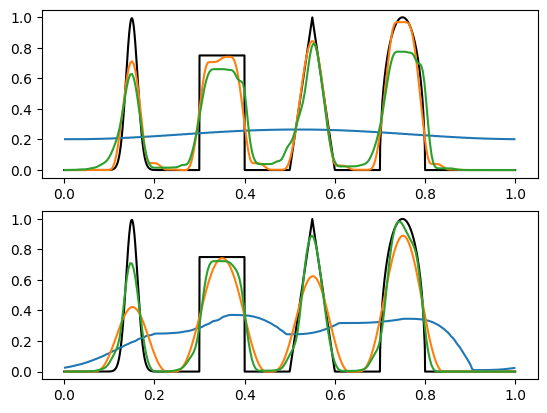

In [20]:
fig, axs = plt.subplots(2)

n = 256
p = 7
num_snapshots, snapshot_dt = 100, 1.0

limiter_configs = {
    "a priori MPP": dict(
        apriori_limiting=True,
        mpp_lite=True,
        courant=0.8,
        adaptive_stepsize=True,
        SED=True,
    ),
    "a posteriori LD": dict(
        aposteriori_limiting=True, fallback_limiter="moncen", courant=0.8, SED=True
    ),
    "a posteriori MD": dict(
        aposteriori_limiting=True,
        fallback_limiter="minmod",
        hancock=True,
        convex=True,
        courant=0.8,
        SED=True,
    ),
}

high_res_initial_solver = AdvectionSolver(n=2048, **problem_configs["composite"])
high_res_initial_solver.plot_slice(axs[0], color="black")
high_res_initial_solver.plot_slice(axs[1], color="black")

for integrator, (i, lc) in product(
    ["ssprk2", "ssprk3", "rk4"],
    enumerate([limiter_configs["a priori MPP"], limiter_configs["a posteriori LD"]]),
):
    solver = AdvectionSolver(
        n=n,
        order=p + 1,
        **lc,
        num_snapshots=num_snapshots,
        snapshot_dt=snapshot_dt,
        **problem_configs["composite"],
        **solver_config,
    )
    if integrator == "ssprk2":
        solver.ssprk2()
    elif integrator == "ssprk3":
        solver.ssprk3()
    elif integrator == "rk4":
        solver.rk4()
    solver.plot_slice(axs[i])
    print(
        f"integrator: {integrator}, lc: {lc}, delta={solver.compute_mpp_violations()[1]['worst']}"
    )

integrator: ssprk3, lc: {'flux_strategy': 'gauss-legendre', 'apriori_limiting': True, 'mpp_lite': True, 'courant': 0.8, 'adaptive_stepsize': True, 'SED': True}
	delta=-3.419761385747615e-11
integrator: ssprk3, lc: {'flux_strategy': 'transverse', 'aposteriori_limiting': True, 'fallback_limiter': 'minmod', 'hancock': True, 'convex': True, 'courant': 0.8, 'SED': True}
	delta=-0.0002872703059917381
integrator: rk4, lc: {'flux_strategy': 'gauss-legendre', 'apriori_limiting': True, 'mpp_lite': True, 'courant': 0.8, 'adaptive_stepsize': True, 'SED': True}
	delta=-1.3694378964146381e-11
integrator: rk4, lc: {'flux_strategy': 'transverse', 'aposteriori_limiting': True, 'fallback_limiter': 'minmod', 'hancock': True, 'convex': True, 'courant': 0.8, 'SED': True}
	delta=-2.3840729707291786e-05


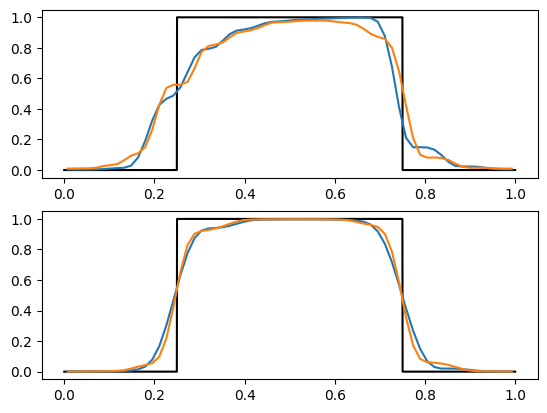

In [25]:
fig, axs = plt.subplots(2)

n = 64
p = 7
num_snapshots, snapshot_dt = 100, 1.0

limiter_configs = {
    "a priori MD": dict(
        flux_strategy="gauss-legendre",
        apriori_limiting=True,
        mpp_lite=True,
        courant=0.8,
        adaptive_stepsize=True,
        SED=True,
    ),
    "a priori LD": dict(
        flux_strategy="transverse",
        apriori_limiting=True,
        mpp_lite=True,
        courant=0.8,
        SED=True,
    ),
    "a posteriori LD": dict(
        flux_strategy="transverse",
        aposteriori_limiting=True,
        fallback_limiter="moncen",
        courant=0.8,
        SED=True,
    ),
    "a posteriori MD": dict(
        flux_strategy="transverse",
        aposteriori_limiting=True,
        fallback_limiter="minmod",
        hancock=True,
        convex=True,
        courant=0.8,
        SED=True,
    ),
}

high_res_initial_solver = AdvectionSolver(n=(2048,), **problem_configs["square2d"])
high_res_initial_solver.plot_slice(axs[0], color="black", y=0.5)
high_res_initial_solver.plot_slice(axs[1], color="black", y=0.5)

for integrator, (i, lc) in product(
    ["ssprk3", "rk4"],
    enumerate([limiter_configs["a priori MD"], limiter_configs["a posteriori MD"]]),
):
    solver = AdvectionSolver(
        n=(n,),
        order=p + 1,
        **lc,
        num_snapshots=num_snapshots,
        snapshot_dt=snapshot_dt,
        **problem_configs["square2d"],
        **solver_config,
    )
    if integrator == "ssprk2":
        solver.ssprk2()
    elif integrator == "ssprk3":
        solver.ssprk3()
    elif integrator == "rk4":
        solver.rk4()
    elif integrator == "rk6":
        if lc.get("adaptie_stepsize", False):
            continue
        solver.rk6()
    solver.plot_slice(axs[i], y=0.5, i=10)
    print(f"integrator: {integrator}, lc: {lc}")
    print(f"\tdelta={solver.compute_mpp_violations()[1]['worst']}")

integrator: ssprk3, lc: {'flux_strategy': 'gauss-legendre', 'apriori_limiting': True, 'mpp_lite': True, 'courant': 1.6, 'adaptive_stepsize': True, 'SED': True}
	delta=-9.648149661614207e-11
integrator: ssprk3, lc: {'flux_strategy': 'transverse', 'aposteriori_limiting': True, 'fallback_limiter': 'minmod', 'hancock': True, 'convex': True, 'courant': 1.6, 'SED': True}
	delta=-0.0005613566702609152
integrator: rk4, lc: {'flux_strategy': 'gauss-legendre', 'apriori_limiting': True, 'mpp_lite': True, 'courant': 1.6, 'adaptive_stepsize': True, 'SED': True}
	delta=-9.368950060206771e-11
integrator: rk4, lc: {'flux_strategy': 'transverse', 'aposteriori_limiting': True, 'fallback_limiter': 'minmod', 'hancock': True, 'convex': True, 'courant': 1.6, 'SED': True}
	delta=-0.0007891577507828096
integrator: rk6, lc: {'flux_strategy': 'gauss-legendre', 'apriori_limiting': True, 'mpp_lite': True, 'courant': 1.6, 'adaptive_stepsize': True, 'SED': True}
	delta=-9.071499107449199e-11
integrator: rk6, lc: {'

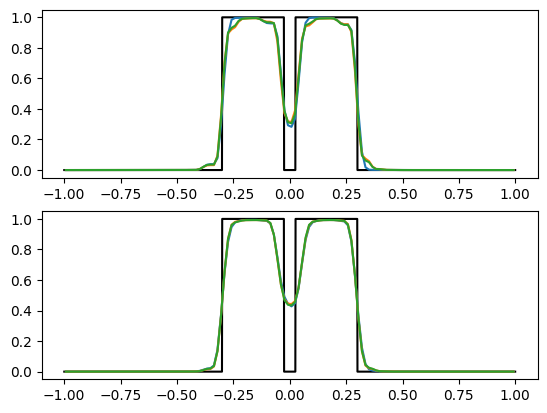

In [3]:
fig, axs = plt.subplots(2)

n = 128
p = 7
num_snapshots, snapshot_dt = 10, 2 * np.pi / 10

limiter_configs = {
    "a priori MD": dict(
        flux_strategy="gauss-legendre",
        apriori_limiting=True,
        mpp_lite=True,
        courant=0.8,
        adaptive_stepsize=True,
        SED=True,
    ),
    "a priori LD": dict(
        flux_strategy="transverse",
        apriori_limiting=True,
        mpp_lite=True,
        courant=0.8,
        SED=True,
    ),
    "a posteriori LD": dict(
        flux_strategy="transverse",
        aposteriori_limiting=True,
        fallback_limiter="moncen",
        courant=0.8,
        SED=True,
    ),
    "a posteriori MD": dict(
        flux_strategy="transverse",
        aposteriori_limiting=True,
        fallback_limiter="minmod",
        hancock=True,
        convex=True,
        courant=0.8,
        SED=True,
    ),
}

high_res_initial_solver = AdvectionSolver(n=(2048,), **problem_configs["disk"])
high_res_initial_solver.plot_slice(axs[0], color="black", y=0.5)
high_res_initial_solver.plot_slice(axs[1], color="black", y=0.5)

for integrator, (i, lc) in product(
    ["ssprk3", "rk4", "rk6"],
    enumerate([limiter_configs["a priori MD"], limiter_configs["a posteriori MD"]]),
):
    solver = AdvectionSolver(
        n=(n,),
        order=p + 1,
        **lc,
        num_snapshots=num_snapshots,
        snapshot_dt=snapshot_dt,
        **problem_configs["disk"],
        **solver_config,
    )
    if integrator == "ssprk2":
        solver.ssprk2()
    elif integrator == "ssprk3":
        solver.ssprk3()
    elif integrator == "rk4":
        solver.rk4()
    elif integrator == "rk6":
        if lc.get("adaptie_stepsize", False):
            continue
        solver.rk6()
    solver.plot_slice(axs[i], y=0.5)
    print(f"integrator: {integrator}, lc: {lc}")
    print(f"\tdelta={solver.compute_mpp_violations()[1]['worst']}")